### Task 1
Record your voice by saying "Hello" and save it as .wav file. Read it and display the voice.

In [11]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 8000  
seconds = 5  

devices = sd.query_devices()
print(devices)

default_input_device = sd.default.device['input']
device_info = sd.query_devices(default_input_device, 'input')
max_input_channels = device_info['max_input_channels']

print(f"Default input device: {default_input_device}")
print(f"Maximum input channels: {max_input_channels}")

channels = min(2, max_input_channels)

try:
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=channels)
    sd.wait()
    write('./myVoice.wav', fs, myrecording)
    print("Recording saved successfully!")
except sd.PortAudioError as e:
    print(f"An error occurred: {e}")
    print("Please check the device and channel configuration.")

  0 Maanasa’s iPhone Microphone, Core Audio (1 in, 0 out)
> 1 MacBook Pro Microphone, Core Audio (1 in, 0 out)
< 2 MacBook Pro Speakers, Core Audio (0 in, 2 out)
  3 Microsoft Teams Audio, Core Audio (2 in, 2 out)
Default input device: 1
Maximum input channels: 1
Recording saved successfully!


In [13]:
import sounddevice as sd
from scipy.io import wavfile

try:
    fs, x = wavfile.read('./myVoice.wav')
    print(f"Sample rate: {fs}, Number of samples: {len(x)}")

    print("Playing original song...")
    sd.play(x, fs)
    sd.wait()

    print("Playing song at increased frequency...")
    sd.play(x, 2 * fs)
    sd.wait()

    print("Playing song at decreased frequency...")
    sd.play(x, fs // 2) 
    sd.wait()

    print("Playback finished successfully!")

except FileNotFoundError:
    print("The specified WAV file was not found. Please check the file path.")
except ValueError as e:
    print(f"An error occurred while reading the WAV file: {e}")
except sd.PortAudioError as e:
    print(f"An error occurred during playback: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Sample rate: 8000, Number of samples: 40000
Playing original song...
Playing song at increased frequency...
Playing song at decreased frequency...
Playback finished successfully!


Sample rate: 8000, Number of samples: 40000


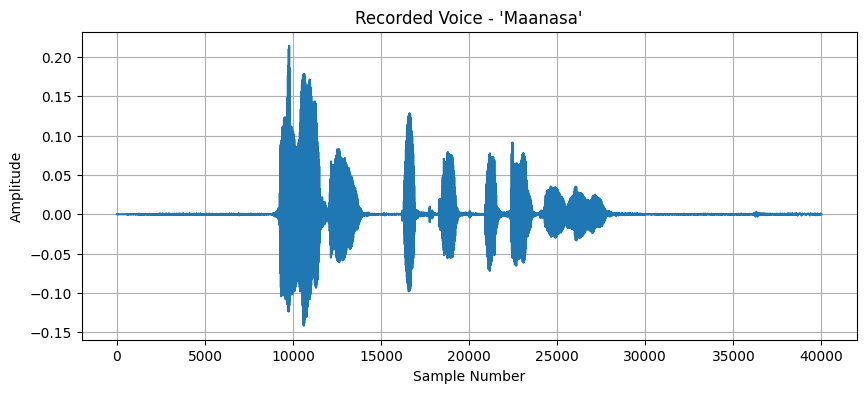

In [14]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

try:
    fs, data = wavfile.read('myVoice.wav')
    print(f"Sample rate: {fs}, Number of samples: {len(data)}")

    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title("Recorded Voice - 'Maanasa'")
    plt.xlabel("Sample Number")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("The specified WAV file 'maanasa.wav' was not found. Please check the file path.")
except ValueError as e:
    print(f"An error occurred while reading the WAV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


### Task 2
Read the "cameraman image" and store it in different file formats like "jpg", "png","bmp","tif". Analyze how much space is required to store the image in different file formats. Plot the storage space against file format as a bar plot.

Saved cameraman.jpg with size 115649 bytes
Saved cameraman.png with size 259996 bytes
Saved cameraman.bmp with size 624382 bytes
Saved cameraman.tif with size 267192 bytes


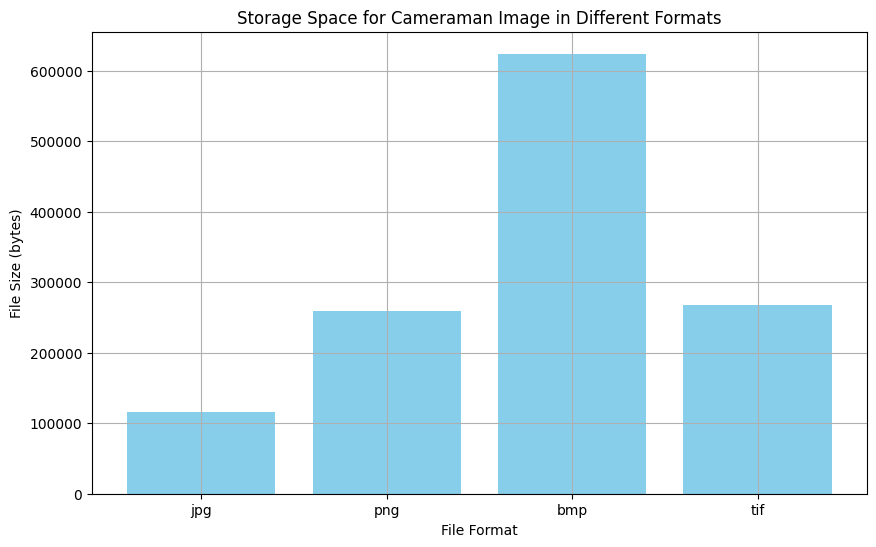

In [16]:
import cv2
import matplotlib.pyplot as plt
import os

try:
    image_path = '../cameraman.png'
    img = cv2.imread(image_path, 0)

    if img is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found.")

    formats = ['jpg', 'png', 'bmp', 'tif']
    file_sizes = []

    for fmt in formats:
        filename = f"cameraman.{fmt}"
        cv2.imwrite(filename, img)
        file_size = os.path.getsize(filename)
        file_sizes.append(file_size)
        print(f"Saved {filename} with size {file_size} bytes")

    plt.figure(figsize=(10, 6))
    plt.bar(formats, file_sizes, color='skyblue')
    plt.xlabel("File Format")
    plt.ylabel("File Size (bytes)")
    plt.title("Storage Space for Cameraman Image in Different Formats")
    plt.grid(True)
    plt.show()

except FileNotFoundError as e:
    print(e)
except cv2.error as e:
    print(f"An OpenCV error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### Task 3
Read a gray scale image (cameraman image). Write an algorithm to scramble all the pixels in the image. Display the input image and the scrambled image.

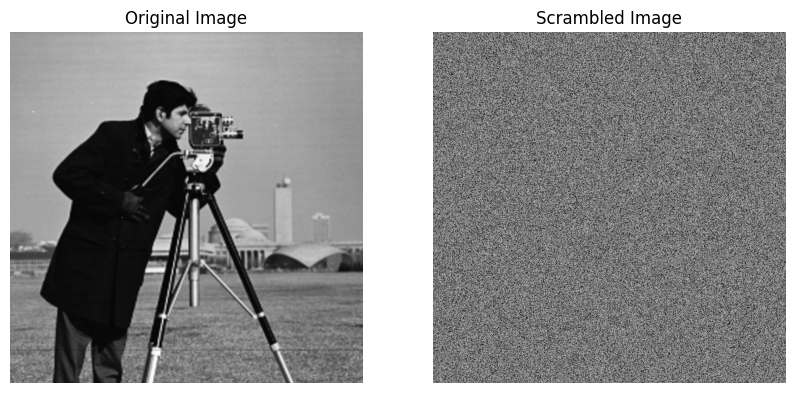

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

try:
    image_path = '../cameraman.png'
    img = cv2.imread(image_path, 0)

    if img is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found.")

    flat_img = img.flatten()
    np.random.shuffle(flat_img)
    scrambled_img = flat_img.reshape(img.shape)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(scrambled_img, cmap='gray')
    plt.title('Scrambled Image')
    plt.axis('off')

    plt.show()

except FileNotFoundError as e:
    print(e)
except cv2.error as e:
    print(f"An OpenCV error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")